In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.DataFrame(pd.read_csv("./station_day.csv"))

dataframe.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
columns_to_select = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
#columns_to_select = ['PM2.5','PM10','O3','NO2','SO2','CO']
df = dataframe[columns_to_select]
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07


In [4]:
# Calculate null value ratios
null_ratio = df.isnull().mean()

# Create a DataFrame to display the description
null_ratio_df = null_ratio.reset_index()
null_ratio_df.columns = ['Column', 'Proportion']

# Sort the DataFrame by the null value ratio in descending order
null_ratio_df = null_ratio_df.sort_values(by='Proportion', ascending=False)

# Display the null ratio table
print(null_ratio_df)

# Visualize the null values with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues', yticklabels=True, annot=True)
plt.title('Heatmap of Missing Data Proportions')
plt.show()

     Column  Proportion
11   Xylene    0.788050
5       NH3    0.445272
1      PM10    0.395298
10  Toluene    0.358236
9   Benzene    0.291156
8        O3    0.236664
7       SO2    0.233295
0     PM2.5    0.200167
2        NO    0.158338
3       NO2    0.153163
4       NOx    0.143472
6        CO    0.120313


In [ ]:
# Chuyển đổi các giá trị để tổng mỗi hàng bằng 1
df = df.div(df.sum(axis=1), axis=0)*100
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
1,20.357634,31.136676,0.360135,5.126923,3.021133,2.681005,0.030011,3.811429,31.784419,0.050019,1.625610,0.015006
2,18.983905,31.282723,0.305410,6.302114,3.599476,2.491759,0.033934,6.534807,28.466162,0.053326,1.926992,0.019391
3,19.734970,30.087158,1.467449,6.859214,4.840359,2.870420,0.024457,7.468428,24.859925,0.064479,1.696460,0.026681
4,16.462320,26.699328,0.656646,7.200021,4.363105,2.929257,0.023085,4.873544,35.443493,0.043605,1.287642,0.017955
5,19.584899,31.035321,1.413399,6.269762,4.483420,3.310542,0.043240,2.851120,29.657055,0.056752,1.272870,0.021620


In [ ]:
# Chuyển đổi CLR
clr_transformed = clr(df + 1e-10)  # Thêm một giá trị nhỏ để tránh log(0)

# Chuyển đổi thành DataFrame
clr_df = pd.DataFrame(clr_transformed, columns=columns_to_select)

# Xác định biến đầu ra

# Loại bỏ các điểm bất thường
y = clr_df['CO']
clr_df = clr_df.drop('CO', axis=1)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(clr_df, y, test_size=0.3, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

clr_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,O3,Benzene,Toluene,Xylene
0,2.701882,3.126812,-1.332850,1.322932,0.794058,0.674618,1.026430,3.147402,-3.306931,0.174309,-4.510904
1,2.538639,3.038113,-1.591053,1.435932,0.875835,0.508036,1.472190,2.943763,-3.336292,0.251007,-4.347893
2,2.398767,2.820474,-0.200099,1.341968,0.993364,0.470834,1.427060,2.629632,-3.325043,-0.055081,-4.207432
3,2.411851,2.895415,-0.809833,1.584861,1.083961,0.685526,1.194598,3.178717,-3.521797,-0.136411,-4.409101
4,2.464458,2.924826,-0.164303,1.325438,0.990086,0.686812,0.537412,2.879400,-3.379362,-0.269026,-4.344443


In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Kiểm tra số dòng của DataFrame
num_rows = df.shape[0]
print(f"Số dòng của DataFrame hiện tại là: {num_rows}")

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Số dòng của DataFrame hiện tại là: 10314
Mean Squared Error: 5.414671877644573e-29
R^2 Score: 1.0


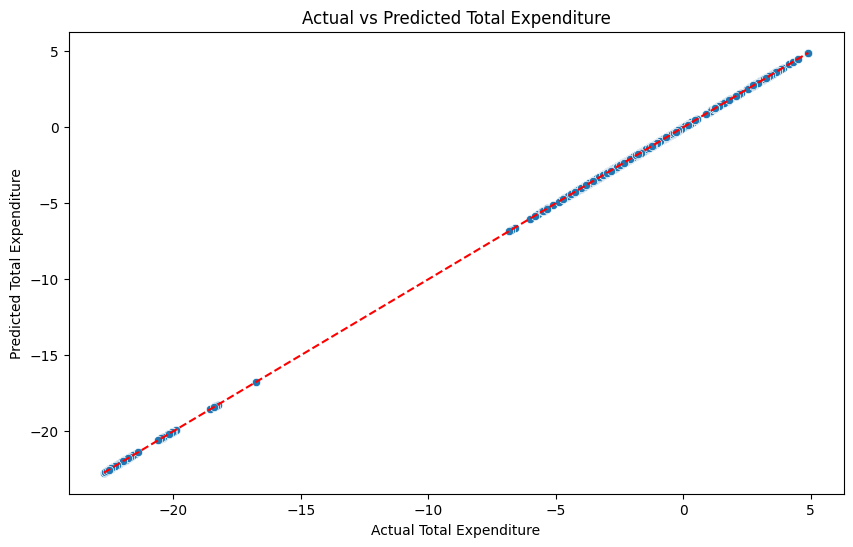

In [ ]:
# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

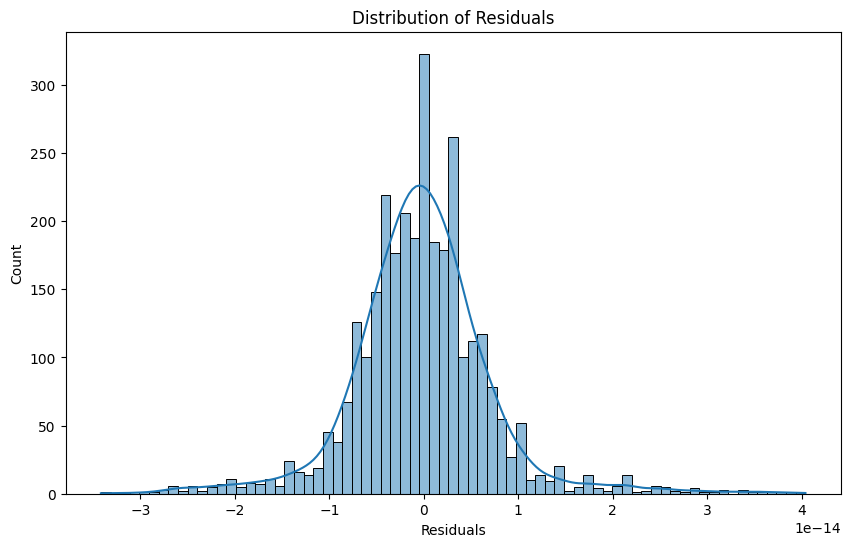

In [ ]:
# Vẽ biểu đồ phân phối phần dư
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

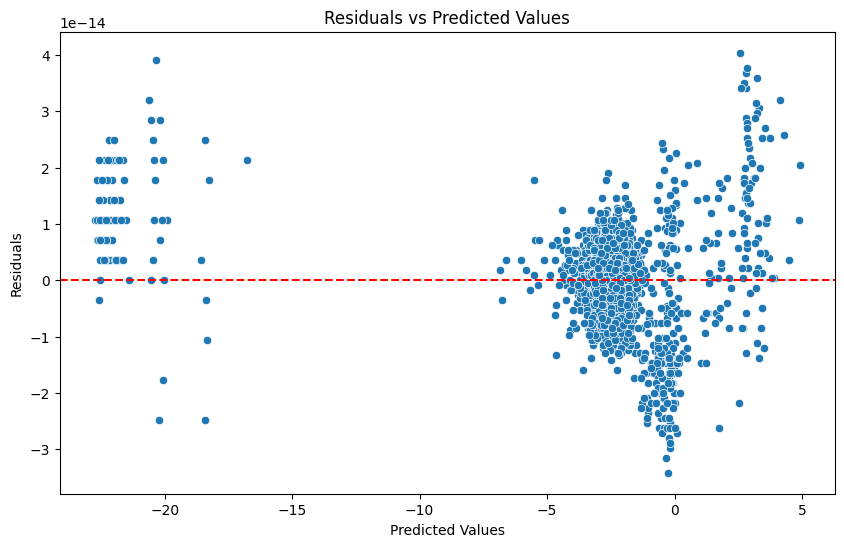

In [ ]:
# Vẽ biểu đồ Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [ ]:
# Chuyển đổi ILR
ilr_transformed = ilr(data_food + 1e-10)

# Chuyển đổi thành DataFrame
ilr_df = pd.DataFrame(ilr_transformed)
ilr_df.head()

NameError: name 'data_food' is not defined

In [ ]:
# Chọn một biến tham chiếu, ví dụ, biến cuối cùng
alr_transformed = alr(data_food + 1e-10, denominator_idx=-1)

# Chuyển đổi thành DataFrame
alr_columns = [f'{col}/denominator' for col in eat_and_drink[:-1]]
alr_df = pd.DataFrame(alr_transformed, columns=alr_columns)
alr_df.head()

NameError: name 'data_food' is not defined

Số dòng của DataFrame hiện tại là: 10314
Mean Squared Error: 3221.7135043268468
R^2 Score: 0.3699764861203769


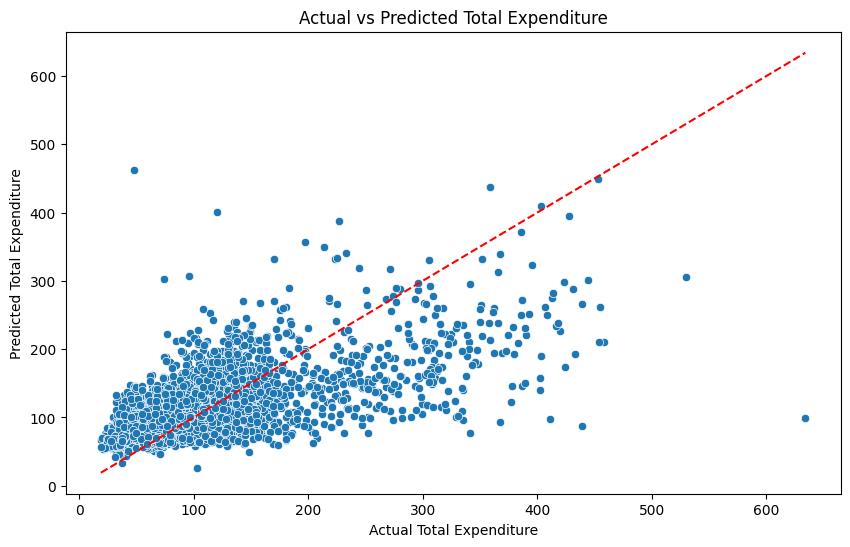

In [ ]:
#mô hình không sử dụng CoDA
# Loại bỏ các điểm bất thường
y = dataframe['CO']

columns_to_select = ['PM2.5','PM10','O3','NO2','SO2','CO']

df = dataframe[columns_to_select]
df.drop('CO', axis=1)
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Kiểm tra số dòng của DataFrame
num_rows = df.shape[0]
print(f"Số dòng của DataFrame hiện tại là: {num_rows}")

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
